In [66]:
# numpy for scientific computing and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt

In [67]:
np.random.seed(0)

In [68]:
# we are generating a data from normal distribution whose mean is 5, standard deviation is 1 and no of data points is 10
dogs_whisker_length=np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index=np.random.normal(loc=8,scale=1,size=10)

In [69]:
cats_whisker_length=np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index=np.random.normal(loc=5,scale=1,size=10)

In [70]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

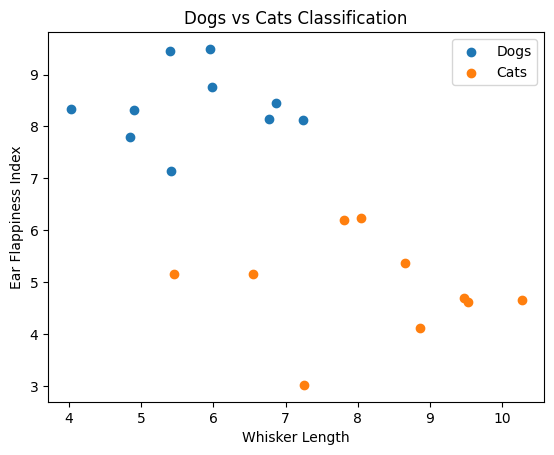

In [71]:
# plot the data points
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label="Dogs")
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label="Cats")
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.title("Dogs vs Cats Classification")
plt.legend()
plt.show()

In [72]:
# Implementing random linear classifier algorithm
def random_linear_classifier(data_dogs,data_cats,k,d):
    # d is the number of features x1 and x2 i.e whishker length and ear flappiness index
    # theta is an array that contains the coefficients of the features theta1 for x1 and theta2 for x2
    best_error=float("inf")
    best_theta=None
    best_theta0=None
    
    for _ in range(k):
        theta=np.random.normal(size=d)
        theta0 = np.random.normal()
        
        error=compute_error(data_dogs,data_cats,theta,theta0)
        
        if(error < best_error):
            best_error=error
            best_theta=theta
            best_theta0=theta0
    return best_theta,best_theta0,best_error

In [73]:
def compute_error(data_dogs,data_cats,theta,theta0):
    error=0
    for x_dog in data_dogs:
        if np.dot(theta,x_dog)+theta0<=0:
            error+=1
    
    for x_cat in data_cats:
        if np.dot(theta,x_cat)+theta0 > 0:
            error+=1
    return error

In [74]:
# prepare data for the algorithm
dogs_data = np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T

In [75]:
# run the random linear classifier algorithm
k=100
d=2
best_theta,best_theta0,best_error=random_linear_classifier(dogs_data,cats_data,k,d)

In [76]:
best_theta

array([-1.07075262,  1.05445173])

In [77]:
best_theta0

-0.40317694697317963

In [78]:
#plot the decision boundary
x_vals=np.linspace(2,10,100)
y_vals=(-best_theta[0]/best_theta[1])* x_vals - (best_theta0/best_theta[1])

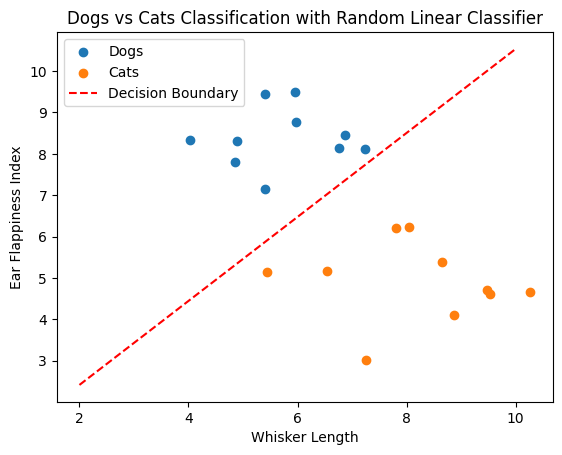

In [79]:
# plot the data points
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label="Dogs")
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label="Cats")
plt.plot(x_vals,y_vals,color="red",linestyle="--",label="Decision Boundary")
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.title("Dogs vs Cats Classification with Random Linear Classifier")
plt.legend()
plt.show()